<a href="https://colab.research.google.com/github/melodiw82/FoodClassification_DL/blob/main/Alex_net_FoodClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten ,Dropout ,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization ,GlobalAveragePooling2D
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential, layers
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Downloading The Dataset

In [ ]:
import gdown

file_id = '15CHt2ueS4c7emHpmzFHC3c0TGd51Mnvz'
output_file = '/content/train.zip'

if not os.path.exists(output_file):
    gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)

Downloading...
From (original): https://drive.google.com/uc?id=15CHt2ueS4c7emHpmzFHC3c0TGd51Mnvz
From (redirected): https://drive.google.com/uc?id=15CHt2ueS4c7emHpmzFHC3c0TGd51Mnvz&confirm=t&uuid=3d040571-ff5c-47b4-8acd-a51da10493f6
To: /content/train.zip
100%|██████████| 898M/898M [00:17<00:00, 52.7MB/s]


In [ ]:
import zipfile

zip_file_path = '/content/train.zip'
extract_dir = '/content/Data/'

if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

# Cleaning Corrupted Images

In [ ]:
train_dir = '/content/Data/train'

In [ ]:
subdirectories = [os.path.join(train_dir, d) for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
subdirectories

['/content/Data/train/donuts',
 '/content/Data/train/hot_dog',
 '/content/Data/train/fish',
 '/content/Data/train/french_fries',
 '/content/Data/train/cheese_sandwich',
 '/content/Data/train/steak',
 '/content/Data/train/lasagna',
 '/content/Data/train/falafel',
 '/content/Data/train/baklava',
 '/content/Data/train/eggs',
 '/content/Data/train/chicken',
 '/content/Data/train/omelette',
 '/content/Data/train/pizza',
 '/content/Data/train/hamburger',
 '/content/Data/train/spaghetti',
 '/content/Data/train/baked_potato',
 '/content/Data/train/ice_cream',
 '/content/Data/train/chocolate_cake',
 '/content/Data/train/caesar_salad',
 '/content/Data/train/cheesecake',
 '/content/Data/train/sushi',
 '/content/Data/train/chicken_curry']

In [ ]:
import PIL
from PIL import Image
import os

In [ ]:
# Identify and delete corrupted image in each of the folder file
for folder_path in subdirectories:
  for filename in os.listdir(folder_path):
      try:
          image = Image.open(os.path.join(folder_path, filename))
      except PIL.UnidentifiedImageError as e:
          print(f"Error in file {filename}: {e}")
          os.remove(os.path.join(folder_path, filename))
          print(f"Removed file {filename}")

Error in file 052f1133-141.jpg: cannot identify image file '/content/Data/train/chicken/052f1133-141.jpg'
Removed file 052f1133-141.jpg
Error in file 2a2a3166-2d2.jpg: cannot identify image file '/content/Data/train/chicken/2a2a3166-2d2.jpg'
Removed file 2a2a3166-2d2.jpg
Error in file 1b4ed8be-285.jpg: cannot identify image file '/content/Data/train/chicken/1b4ed8be-285.jpg'
Removed file 1b4ed8be-285.jpg
Error in file e5574159-a60.jpg: cannot identify image file '/content/Data/train/chicken/e5574159-a60.jpg'
Removed file e5574159-a60.jpg
Error in file 6fcf7983-225.jpg: cannot identify image file '/content/Data/train/chicken/6fcf7983-225.jpg'
Removed file 6fcf7983-225.jpg


# Creating The Images

In [ ]:
low_count_categories = [
    'hot_dog',
    'pizza',
    'omelette',
    'caesar_salad',
    'falafel',
    'fish',
    'cheese_sandwich',
    'chicken_curry',
    'ice_cream',
    'chocolate_cake',
    'eggs',
    'lasagna',
    'sushi',
    'steak',
    'baklava',
    'cheesecake'
]

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

for category in low_count_categories:
    category_dir = os.path.join(train_dir, category)
    images = os.listdir(category_dir)
    num_images = len(images)
    if num_images < 1400:
        print(f"Augmenting data for category: {category}")
        for image_name in images:
            img_path = os.path.join(category_dir, image_name)
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            i = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=category_dir, save_prefix='aug', save_format='jpg'):
                i += 1
                if i >= 1:
                    break

Augmenting data for category: hot_dog
Augmenting data for category: pizza
Augmenting data for category: omelette
Augmenting data for category: caesar_salad
Augmenting data for category: falafel
Augmenting data for category: fish
Augmenting data for category: cheese_sandwich
Augmenting data for category: chicken_curry
Augmenting data for category: ice_cream
Augmenting data for category: chocolate_cake
Augmenting data for category: eggs
Augmenting data for category: lasagna
Augmenting data for category: sushi
Augmenting data for category: steak
Augmenting data for category: baklava
Augmenting data for category: cheesecake


# Creating The Dataframe

In [ ]:
categories = sorted(os.listdir (train_dir))
categories

['baked_potato',
 'baklava',
 'caesar_salad',
 'cheese_sandwich',
 'cheesecake',
 'chicken',
 'chicken_curry',
 'chocolate_cake',
 'donuts',
 'eggs',
 'falafel',
 'fish',
 'french_fries',
 'hamburger',
 'hot_dog',
 'ice_cream',
 'lasagna',
 'omelette',
 'pizza',
 'spaghetti',
 'steak',
 'sushi']

In [ ]:
data = pd.DataFrame(columns=['image_path', 'label'])
data

,image_path,label


In [ ]:
dfs = []

for category in categories:
    category_path = os.path.join(train_dir, category)
    image_data = []

















    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)

In [ ]:
data = pd.concat(dfs, ignore_index=True)
data

,image_path,label
0,/content/Data/train/baked_potato/0ca567b2-b93.jpg,baked_potato
1,/content/Data/train/baked_potato/2a15d713-27a.jpg,baked_potato
2,/content/Data/train/baked_potato/c3578bdd-d3a.jpg,baked_potato
3,/content/Data/train/baked_potato/8b60ec93-f7b.jpg,baked_potato
4,/content/Data/train/baked_potato/0038c973-a21.jpg,baked_potato
...,...,...
35384,/content/Data/train/sushi/aug_0_5757.jpg,sushi
35385,/content/Data/train/sushi/aug_0_3627.jpg,sushi
35386,/content/Data/train/sushi/aug_0_6791.jpg,sushi
35387,/content/Data/train/sushi/aug_0_1185.jpg,sushi


In [ ]:
data['label'].value_counts()

label
donuts             2395
hamburger          2376
chicken            2288
french_fries       2286
hot_dog            2071
pizza              1720
spaghetti          1509
baked_potato       1501
omelette           1404
falafel            1399
cheese_sandwich    1395
fish               1394
caesar_salad       1390
ice_cream          1390
chicken_curry      1387
eggs               1379
chocolate_cake     1379
lasagna            1367
sushi              1354
baklava            1338
steak              1338
cheesecake         1329
Name: count, dtype: int64

In [ ]:
df = data.groupby('label').apply(lambda x: x.sample(679)).reset_index(drop=True)

df['label'].value_counts()


label
baked_potato       679
baklava            679
caesar_salad       679
cheese_sandwich    679
cheesecake         679
chicken            679
chicken_curry      679
chocolate_cake     679
donuts             679
eggs               679
falafel            679
fish               679
french_fries       679
hamburger          679
hot_dog            679
ice_cream          679
lasagna            679
omelette           679
pizza              679
spaghetti          679
steak              679
sushi              679
Name: count, dtype: int64

The dataset shows class imbalance, where some food categories have many more samples than others. For example, "donuts" and "hamburger" have lots of samples, while "steak" or "cheesecake" have much fewer.

In [ ]:
labels = df['label']

In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)

In [ ]:
class_weights_dict = dict(enumerate(class_weights))

In [ ]:
print("Class Weights:", class_weights_dict)

Class Weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0}


In [ ]:
class_weights

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

# Train_Test Split

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_df.shape

(11950, 2)

# Image Augmentation

In [ ]:
augmentation_params = {
    'rotation_range': 20,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1,
    'shear_range': 0.2,
    'zoom_range': 0.1,
    'horizontal_flip': True,
    'fill_mode': 'nearest'
}

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    **augmentation_params
)

In [ ]:
img_size = (224, 224)

In [ ]:
batch_size = 32

In [ ]:
val_datagen = ImageDataGenerator(
    rescale = 1./255
    )

In [ ]:
train_images = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=True,
    seed=42,
    class_mode='categorical'
)

Found 11950 validated image filenames belonging to 22 classes.


In [ ]:
val_images = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=False,
    seed=42,
    class_mode='categorical'
)

Found 2988 validated image filenames belonging to 22 classes.


# Visualize Some Images From Different Categories

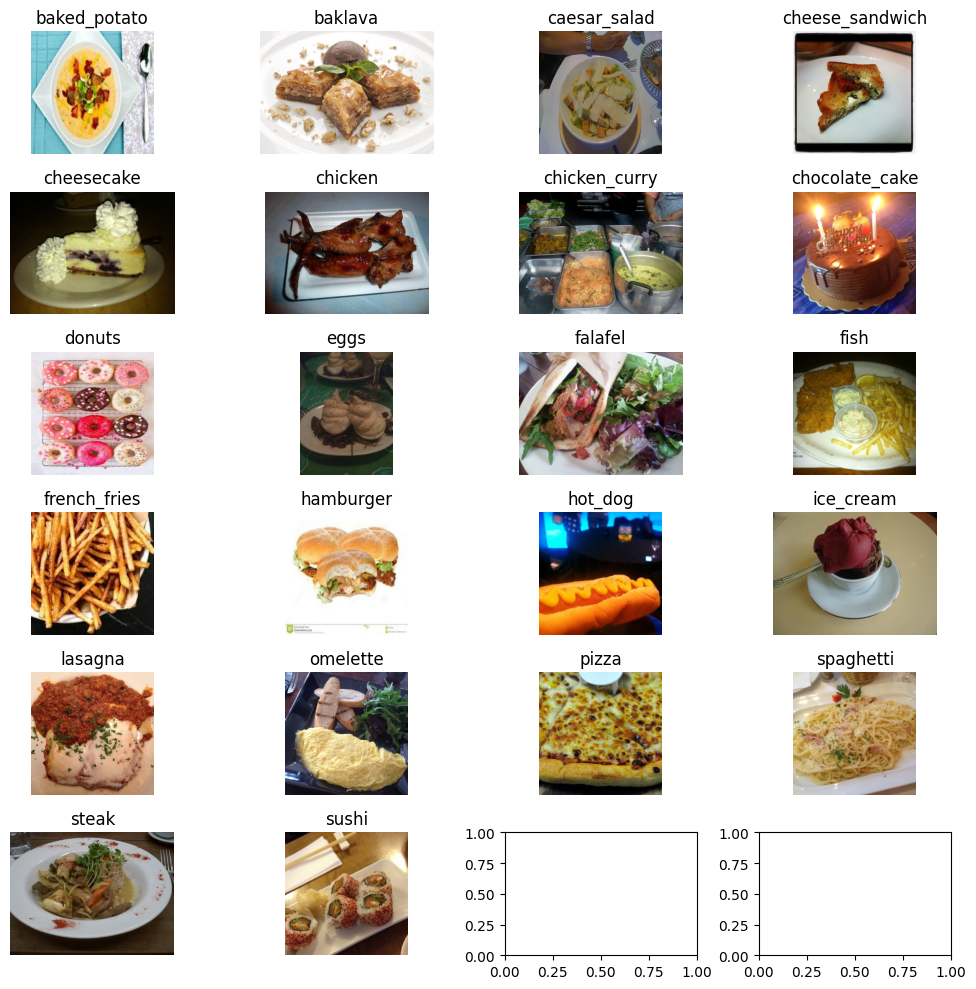

In [ ]:
fig, axes = plt.subplots(6, 4, figsize=(10, 10))
axes = axes.flatten()

for i, category in enumerate(categories):
    category_df = train_df[train_df['label'] == category]
    image_path = category_df.iloc[100]['image_path']
    img = plt.imread(image_path)
    axes[i].imshow(img)
    axes[i].set_title(category)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

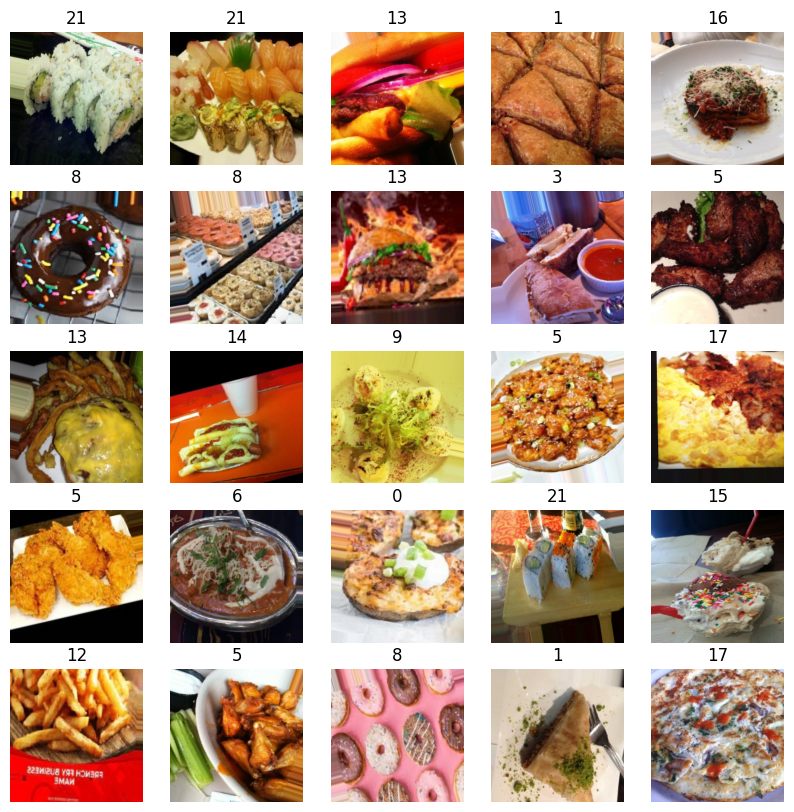

In [ ]:
batch_train_images, batch_train_labels = next(train_images)

class_names = np.argmax(batch_train_labels, axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(batch_train_images[i])
    plt.title(class_names[i])
    plt.axis('off')
plt.show()

# Alex  Next

In [ ]:
pretrained_model_large = ConvNeXtXLarge(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

pretrained_model_large.trainable = False


x = GlobalAveragePooling2D()(pretrained_model_large.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.001)(x)
x = BatchNormalization()(x)
outputs = Dense(len(categories), activation='softmax')(x)


model_conv = Model(pretrained_model_large.input, outputs, name='ConvNeXtLarge')


In [ ]:

model_conv.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

## Load pretrained

In [ ]:
model_al = load_model('/content/models/AlexNET-3.h5')


In [ ]:
history_al = model_al.fit(
    train_images,
    validation_data=val_images,
    epochs=10,
    callbacks=[
        EarlyStopping(
            monitor='val_loss',
            patience=4,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
374/374 [==============================] - 168s 448ms/step - loss: 1.5673 - accuracy: 0.5256 - val_loss: 1.9670 - val_accuracy: 0.4394
Epoch 2/10
374/374 [==============================] - 165s 440ms/step - loss: 1.5122 - accuracy: 0.5490 - val_loss: 1.7108 - val_accuracy: 0.4819
Epoch 3/10
374/374 [==============================] - 165s 442ms/step - loss: 1.4644 - accuracy: 0.5574 - val_loss: 2.1982 - val_accuracy: 0.4019
Epoch 4/10
374/374 [==============================] - 166s 443ms/step - loss: 1.4284 - accuracy: 0.5663 - val_loss: 1.8819 - val_accuracy: 0.4622
Epoch 5/10
374/374 [==============================] - 166s 444ms/step - loss: 1.3706 - accuracy: 0.5879 - val_loss: 2.0644 - val_accuracy: 0.4143
Epoch 6/10
374/374 [==============================] - 161s 430ms/step - loss: 1.3272 - accuracy: 0.5956 - val_loss: 1.8557 - val_accuracy: 0.4806


In [ ]:
model_al.save('/content/models/AlexNET-4.h5', save_format='h5')

In [ ]:
loss_al, accuracy_al = model_al.evaluate(val_images, verbose=0)
print(f"Train Loss: {loss_al:.4f}, Train Accuracy: {accuracy_al:.4f}")

Train Loss: 1.7108, Train Accuracy: 0.4819


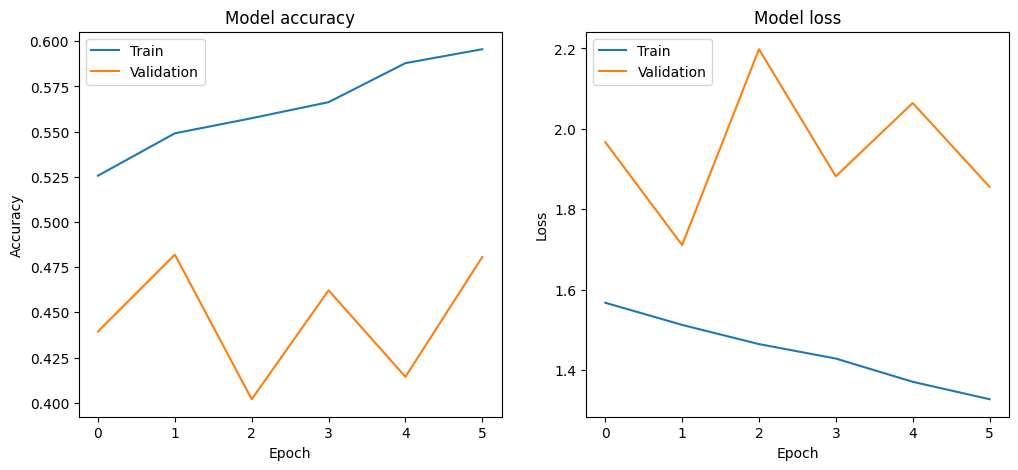

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_al.history['accuracy'])
plt.plot(history_al.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_al.history['loss'])
plt.plot(history_al.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()